# Exploratory Data Analysis for PD Sample 2


In [1]:
import pymongo
from pymongo import MongoClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import plotly.express as px 

#### Connect to MongoDB

In [2]:
client = MongoClient('localhost', 27017)
db = client['pd-sample-2']
collection = db.outputItems

In [3]:
data = pd.DataFrame(list(collection.find()))
data.head()

,_id,url,text,school_id,depth,images,files
0,62335b8e4f0fd5ba6890389a,https://www.cityoforange.org/our-city/departme...,"City of Orange, CA\n Home\n \n Menu\n \n \n \n...",635833.0,1,[],[]
1,62335b8f4f0fd5ba6890389c,https://www.kenosha.org/pay-online,City of Kenosha Menu\n \n \n \n \n \n \nOpen M...,631542.0,1,[],[]
2,62335b904f0fd5ba6890389e,https://florenceal.org/visitors/newcomers___vi...,"Explore, Demographics, Getting Here....\n \n \...",630175.0,1,[],[]
3,62335b924f0fd5ba689038a0,https://florenceal.org/visitors/press_links/pr...,"Explore, Demographics, Getting Here....\n \n \...",630175.0,2,[],[]
4,62335b924f0fd5ba689038a2,https://www.kenosha.org/,City of Kenosha Menu\n \n \n \n \n \n \nOpen M...,631542.0,1,[],[]


In [4]:
data['school_id'].value_counts()

631542.0    7997
635833.0    2911
630740.0    1330
647873.0    1001
630175.0     301
Name: school_id, dtype: int64

#### Average number of files & images

In [6]:
# data["image_count"] = data["image_urls"].apply(len)
# data["file_count"] = data["file_urls"].apply(len)

(array([   0.,  283.,  728., 2002., 3259., 7268.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

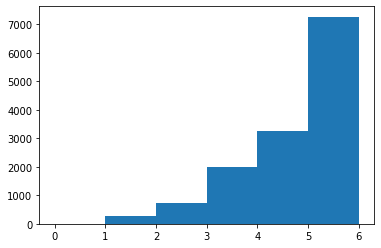

In [5]:
plt.hist(data.depth, bins=np.arange(6.1))

In [7]:
# plt.hist(data.image_count, bins=np.arange(0, 95.1, 5))

In [8]:
# plt.hist(data.file_count, bins=np.arange(6.1))

In [11]:
for d in data['school_id'].unique():
    temp = data[data['school_id']==d]
    
    temp.to_csv(f'../pd-sample-2/{int(d)}.csv')